In [1]:
import os
import math
import tensorflow as tf
import glob
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models,layers,optimizers,datasets
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing import image
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
import os

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(validation_split=0.2, preprocessing_function=preprocess_input)
train_flow = train_gen.flow_from_directory("./data_resized/train/", target_size=(256, 256), batch_size=130, subset="training")
valid_flow = train_gen.flow_from_directory("./data_resized/val/", target_size=(256, 256), batch_size=130, subset="validation")

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet152V2 
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from keras.models import Model


res = ResNet152V2(weights='imagenet', include_top=False, input_shape=(256, 256, 3)) 

for layer in res.layers: 
  layer.trainable = False

x = res.output 
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)

model = Model(res.input, x) 
opt = tf.keras.optimizers.RMSprop(
    learning_rate=1e-4 ,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 

model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [4]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint(
     'model_resnet152_best_weights.h5', 
     monitor='loss', 
     verbose=1, 
     save_best_only=True, 
     mode='min', 
     period=1
)

In [ ]:
history = model.fit_generator(train_flow, epochs=10, validation_data=valid_flow)

C:\Users\admin\AppData\Local\Temp\ipykernel_4800\1268546159.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_flow, epochs=10, validation_data=valid_flow)


Epoch 1/10
 168/2888 [>.............................] - ETA: 22:11 - loss: 0.9763 - accuracy: 0.5116

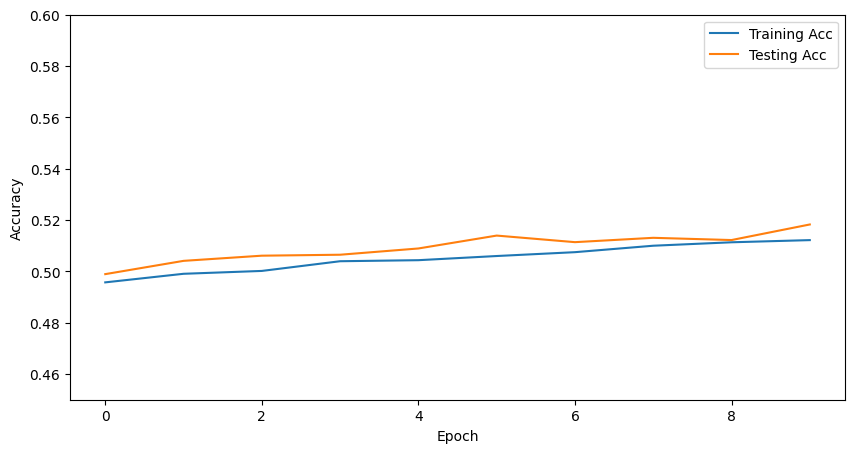

In [7]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'],label='Testing Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.45,0.6])
plt.legend()
plt.savefig('resnet152_balance.png', dpi=300, bbox_inches='tight')